In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report


In [2]:
pip install tensorflow-datasets


In [3]:
import tensorflow_datasets as tfds

# Load the EMNIST letters dataset
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/letters',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/letters/incomplete.EIT6VF_3.1.0/emnist-train.tfrecord*...:   0%|   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/letters/incomplete.EIT6VF_3.1.0/emnist-test.tfrecord*...:   0%|    …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/letters/3.1.0. Subsequent calls will reuse this data.


In [5]:
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize

    # EMNIST is rotated; we need to fix that
    image = tf.image.rot90(image, k=1)  # Rotate 90 degrees counterclockwise

    label = label - 1  # EMNIST labels are 1-26 (make it 0-25)
    return image, label


In [6]:
ds_train = ds_train.map(preprocess).batch(128).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(128).prefetch(tf.data.AUTOTUNE)


In [7]:
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(2),
    layers.Conv2D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(26, activation='softmax')  # 26 letters
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 227,098 (887.10 KB)

 Trainable params: 227,098 (887.10 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(ds_train, epochs=10, validation_data=ds_test)


Epoch 1/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 87s 123ms/step - accuracy: 0.6864 - loss: 1.0836 - val_accuracy: 0.8812 - val_loss: 0.3744
Epoch 2/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 75s 107ms/step - accuracy: 0.8994 - loss: 0.3117 - val_accuracy: 0.9016 - val_loss: 0.2978
Epoch 3/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 81s 106ms/step - accuracy: 0.9221 - loss: 0.2375 - val_accuracy: 0.9075 - val_loss: 0.2794
Epoch 4/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 75s 108ms/step - accuracy: 0.9327 - loss: 0.1994 - val_accuracy: 0.9127 - val_loss: 0.2682
Epoch 5/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 75s 107ms/step - accuracy: 0.9402 - loss: 0.1731 - val_accuracy: 0.9136 - val_loss: 0.2679
Epoch 6/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 79s 104ms/step - accuracy: 0.9462 - loss: 0.1529 - val_accuracy: 0.9140 - val_loss: 0.2714
Epoch 7/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 70s 101ms/step - accuracy: 0.9516 - loss: 0.1356 - val_accuracy: 0.9136 - val_loss: 0.2728
Epoch 8/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 82s 101ms/step - accuracy: 0.9569 - loss: 0

In [9]:
test_loss, test_acc = model.evaluate(ds_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")


116/116 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9134 - loss: 0.3015
Test Accuracy: 91.13%


In [10]:
y_true, y_pred = [], []

for images, labels in ds_test:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

print(classification_report(y_true, y_pred))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


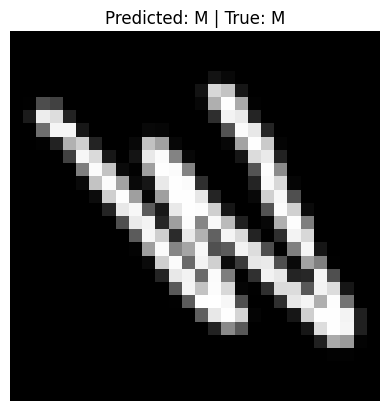

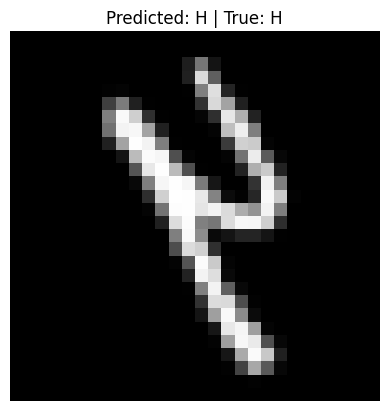

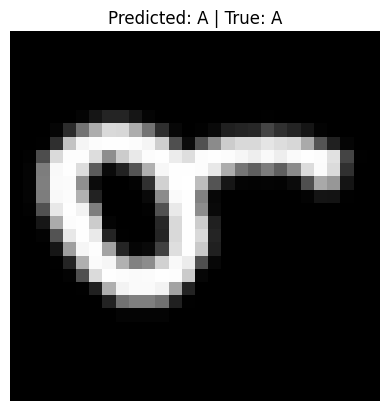

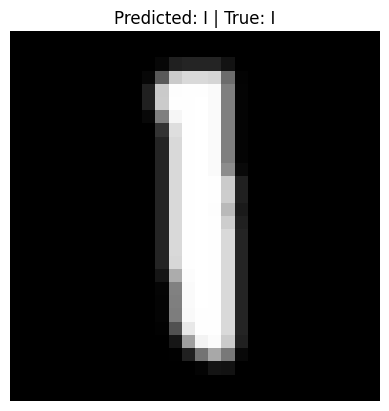

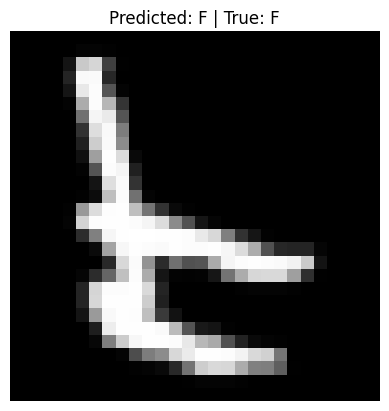

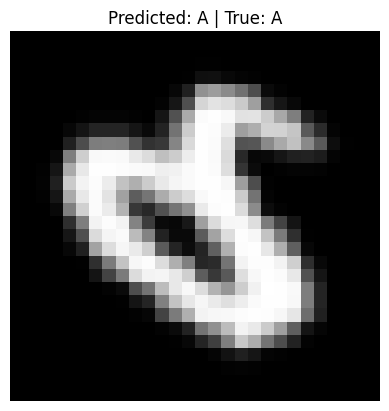

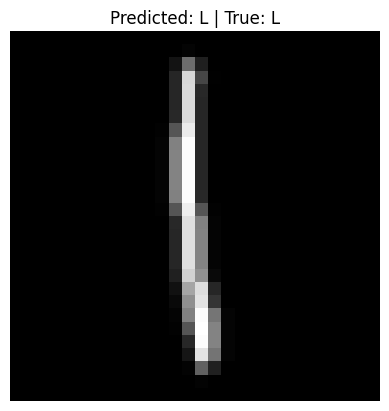

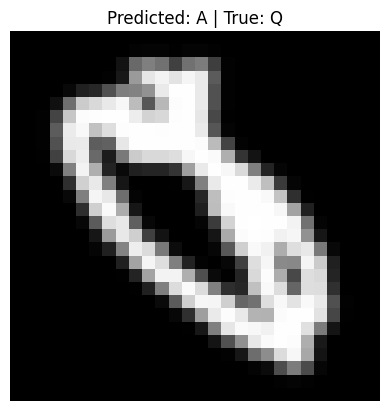

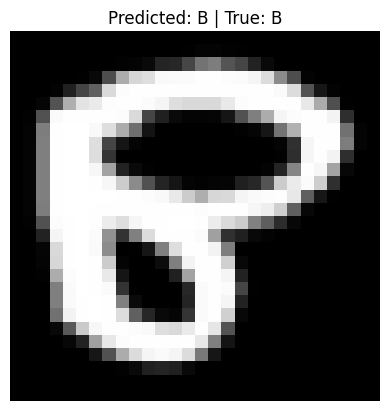

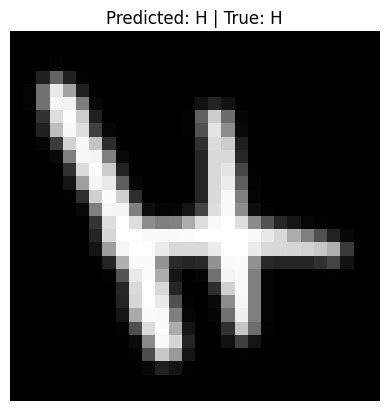

In [11]:
class_names = [chr(i) for i in range(65, 91)]  # A-Z

for images, labels in ds_test.take(1):
    predictions = model.predict(images)
    for i in range(10):
        plt.imshow(tf.squeeze(images[i]), cmap='gray')
        plt.title(f"Predicted: {class_names[np.argmax(predictions[i])]} | True: {class_names[labels[i].numpy()]}")
        plt.axis('off')
        plt.show()


In [15]:
model.save("model.keras")
